In [1]:
# this is by Simone Conradi but the orbit is generated in Apple
# https://github.com/profConradi/Python_Simulations/blob/main/Nice_orbits.ipynb

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, to_rgb
from matplotlib import rcParams

#Latex is needed to create plot titles
rcParams['text.usetex'] = True #set this to False if Latex distribution is not installed
rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amsfonts}\usepackage{systeme}"
%config InlineBackend.figure_format = 'retina'

In [2]:
def create_colormap(hex_color1, hex_color2, reverse=False):
    """
    Create a linearly interpolated colormap from two hex colors.

    -hex_color1: String, the first hex color (e.g., "#FF0000" for red)
    -hex_color2: String, the second hex color (e.g., "#0000FF" for blue)
    -reverse: Boolean, invert colors.
    
    Return: LinearSegmentedColormap
    """
    color1 = to_rgb(hex_color1)
    color2 = to_rgb(hex_color2)
    if reverse:
        colors = [color2, color1]
    else:
        colors = [color1, color2]
    cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)

    return cmap

In [3]:
# a custom colormap
c_labels = "#000000"
yellow_map = create_colormap("#000000", "#ffe100", True)

In [4]:
import apple

In [5]:
orb_x=apple.jit('''
λa.λb.
{
  g ← λ(x,y). (sin. (x^2-y^2+a), cos. (2*x*y+b));
  (frange _1 1 500) [(->1)'(gen. (x,y) g 200)]⊗ (frange _1 1 500)
}
''')

In [6]:
orb_y=apple.jit('''
λa.λb.
{
  g ← λ(x,y). (sin. (x^2-y^2+a), cos. (2*x*y+b));
  (frange _1 1 500) [(->2)'(gen. (x,y) g 200)]⊗ (frange _1 1 500)
}
''')

In [7]:
a,b=5.46,4.55

In [8]:
l_cx=orb_x(a,b)

In [9]:
l_cy=orb_y(a,b)

In [10]:
l_cx=l_cx.flatten()
l_cy=l_cy.flatten()

In [11]:
%timeit orb_x(a,b)

1.35 s ± 32.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
area = [[-1,1],[-1,1]]
h,_,_ = np.histogram2d(l_cx,l_cy,bins=3000,range=area)

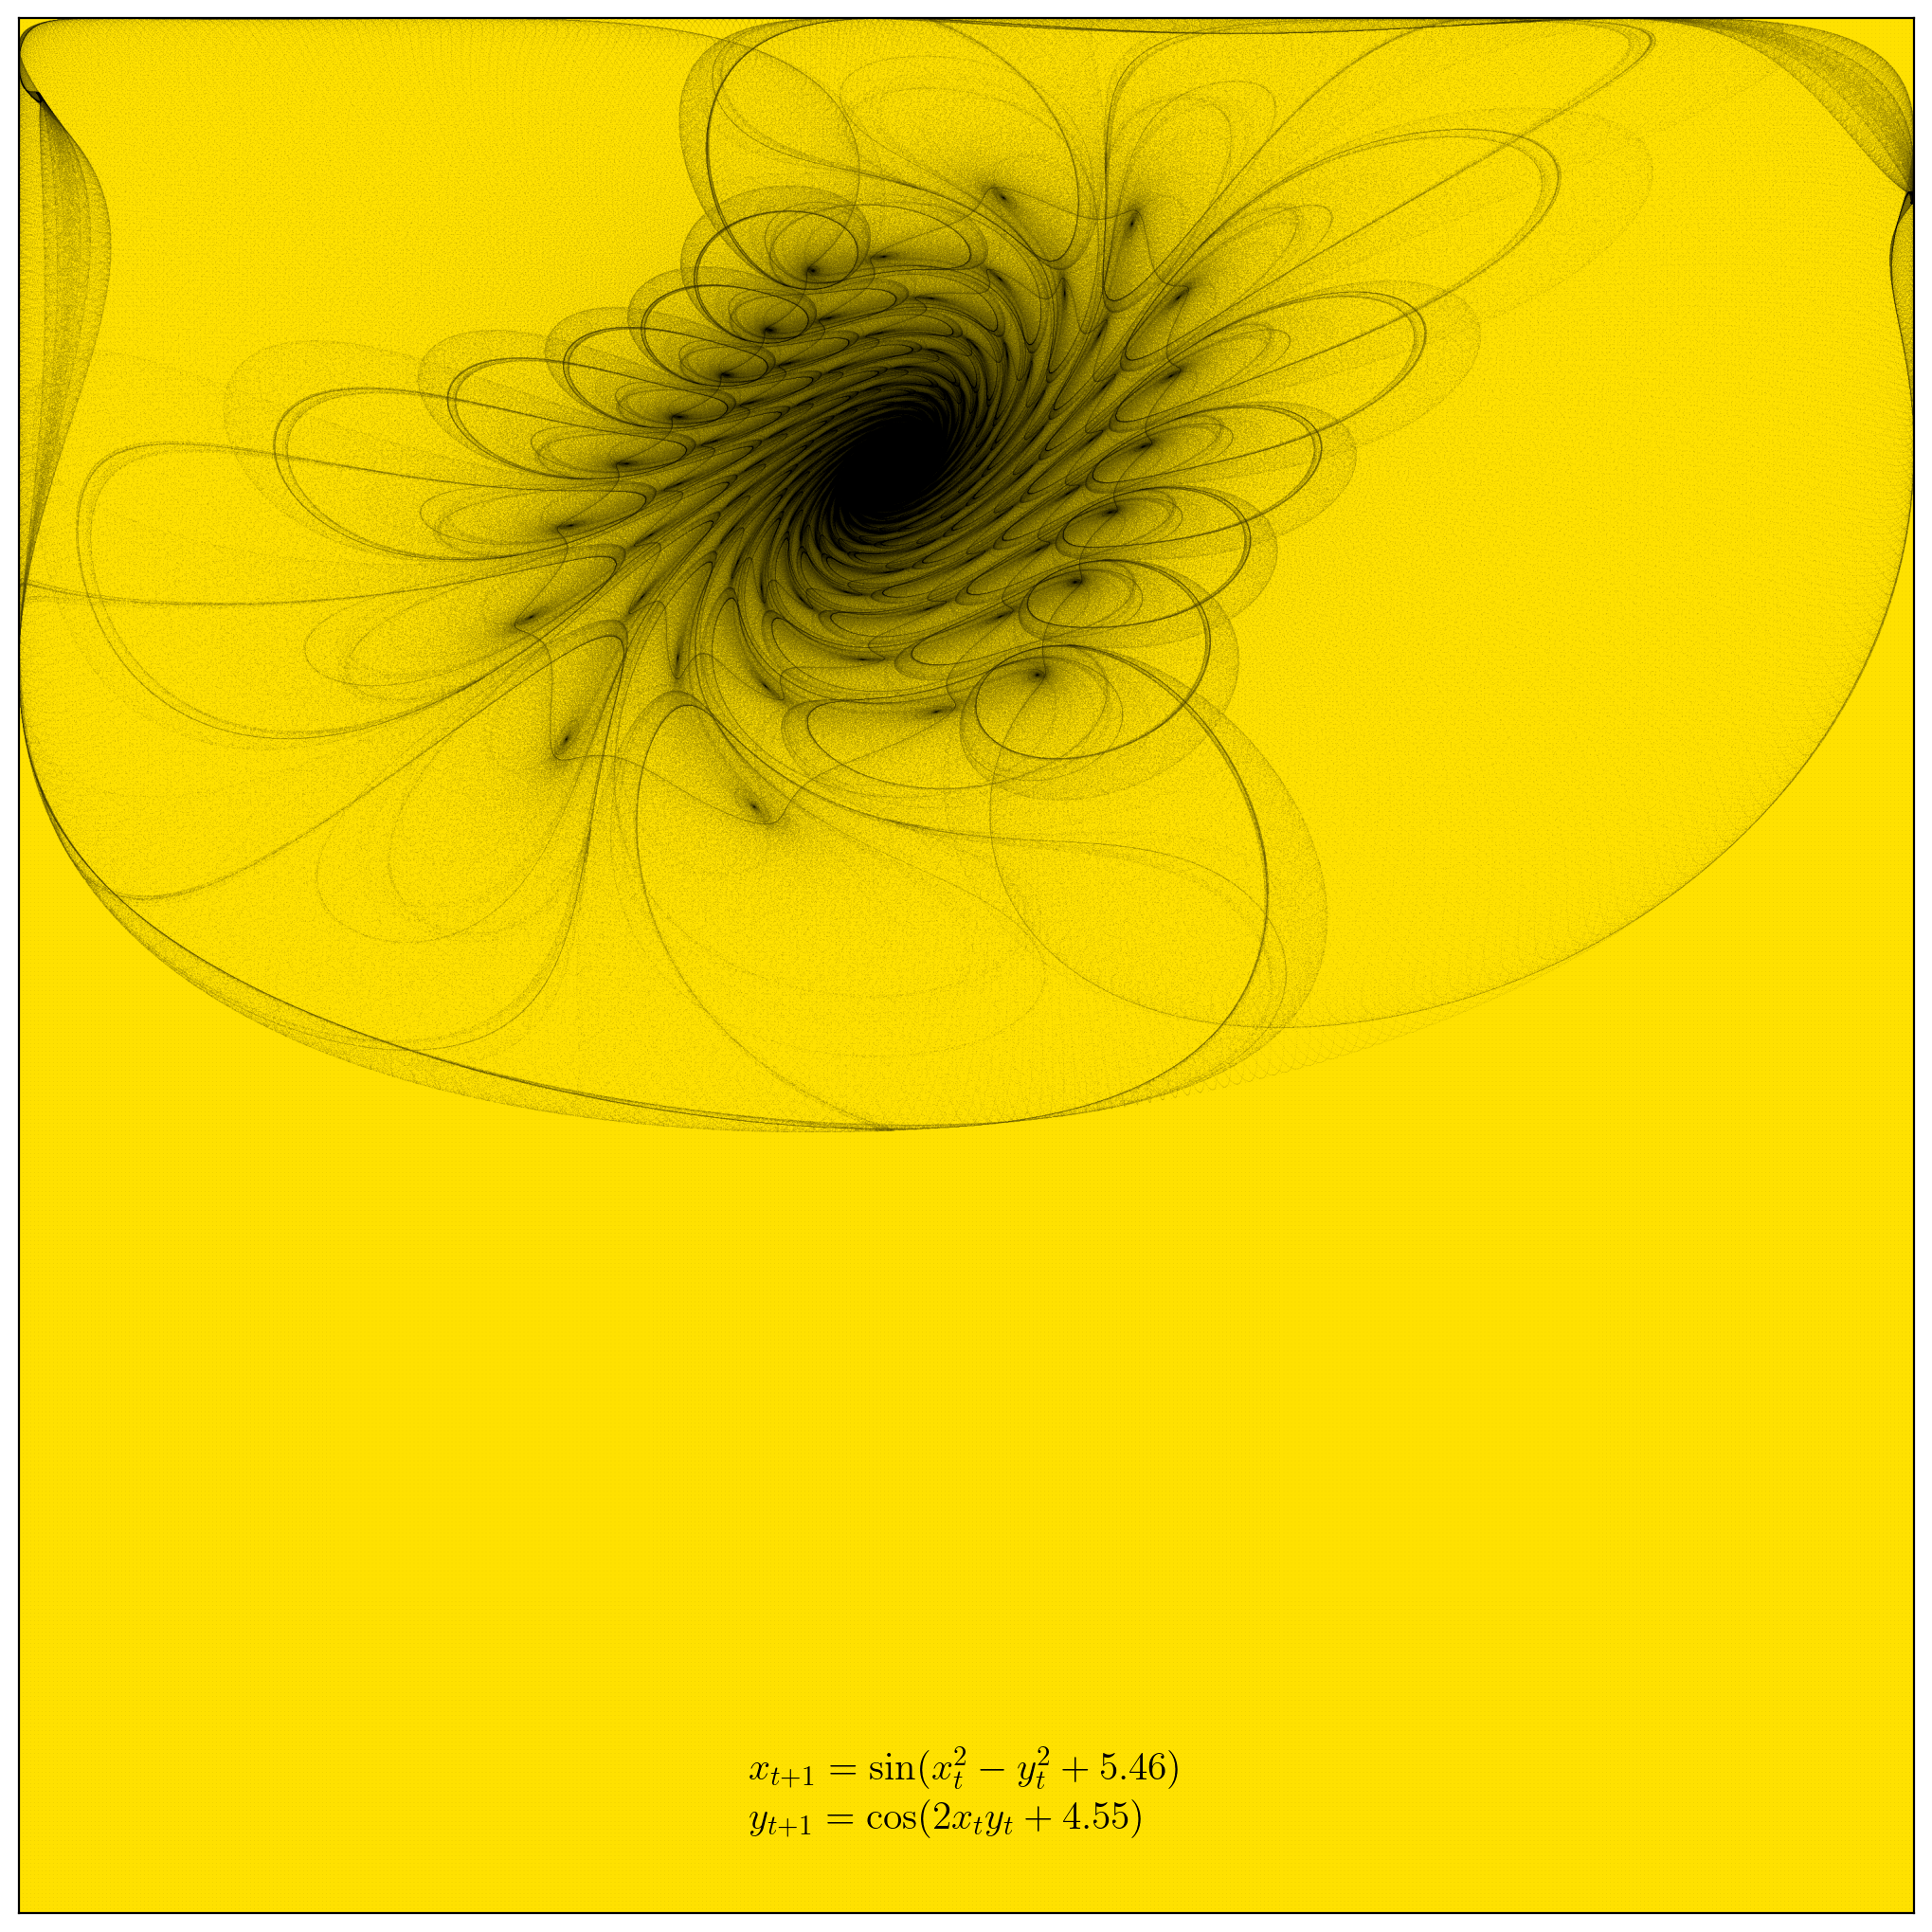

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax.imshow(np.log(h+1),vmin=0,vmax=5,cmap=yellow_map)
plt.xticks([]), plt.yticks([])
ax.set_title(r'$\begin{array}{lr} x_{t+1} = \sin(x_t^2-y_t^2 + %s) \\ y_{t+1} = \cos(2x_t y_t + %s) \end{array}$'%(a,b), 
             y=0.05, fontsize=15, color=c_labels )
plt.show()